In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://raw.githubusercontent.com/everyday-data-science/Data_Science_Projects/refs/heads/main/Sony%20Research/Data/Data_Science_Challenge.csv'
df = pd.read_csv(url)
df_copy = df.copy()
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State: The state where a customer comes from
- Account length: Number of days a customer has been using services
- Area code: The area where a customer comes from
- Phone number: The phone number of a customer
- International plan: The status of customer international plan
- Voicemail plan: The status of customer voicemail plan
- No. vmail msgs: Number of voicemail message sent by a customer
- Total day minutes: Total call minutes spent by a customer during day time
- Total day calls: Total number of calls made by a customer during day time
- Total day charge: Total amount charged to a customer during day time
- Total eve minutes: Total call minutes spent by a customer during evening time
- Total eve calls: Total number of calls made by a customer during evening time
- Total eve charge: Total amount charged to a customer during evening time
- Total night minutes: Total call minutes spent by a customer during night time
- Total night calls: Total number of calls made by a customer during night time
- Total night charge: Total amount charged to a customer during night time
- Total intl minutes: Total international call minutes spent by a customer
- Total intl calls: Total number of international calls made by a customer
- Total int charge: Total international call amount charged to a customer
- Customer service calls: Total number of customer service calls made by a customer
- Churn: Whether a customer is churned or not

In [4]:
print(df.info())
print(df.shape)
print(f'Null values: \n{df.isna().sum()}')
print(f'Duplicate values: \n{df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# EDA

In [5]:
# for numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# for categorical features
df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


In [7]:
# phone number is an irrelevant feeature so dropping it
df = df.drop(columns='phone number', axis=1)

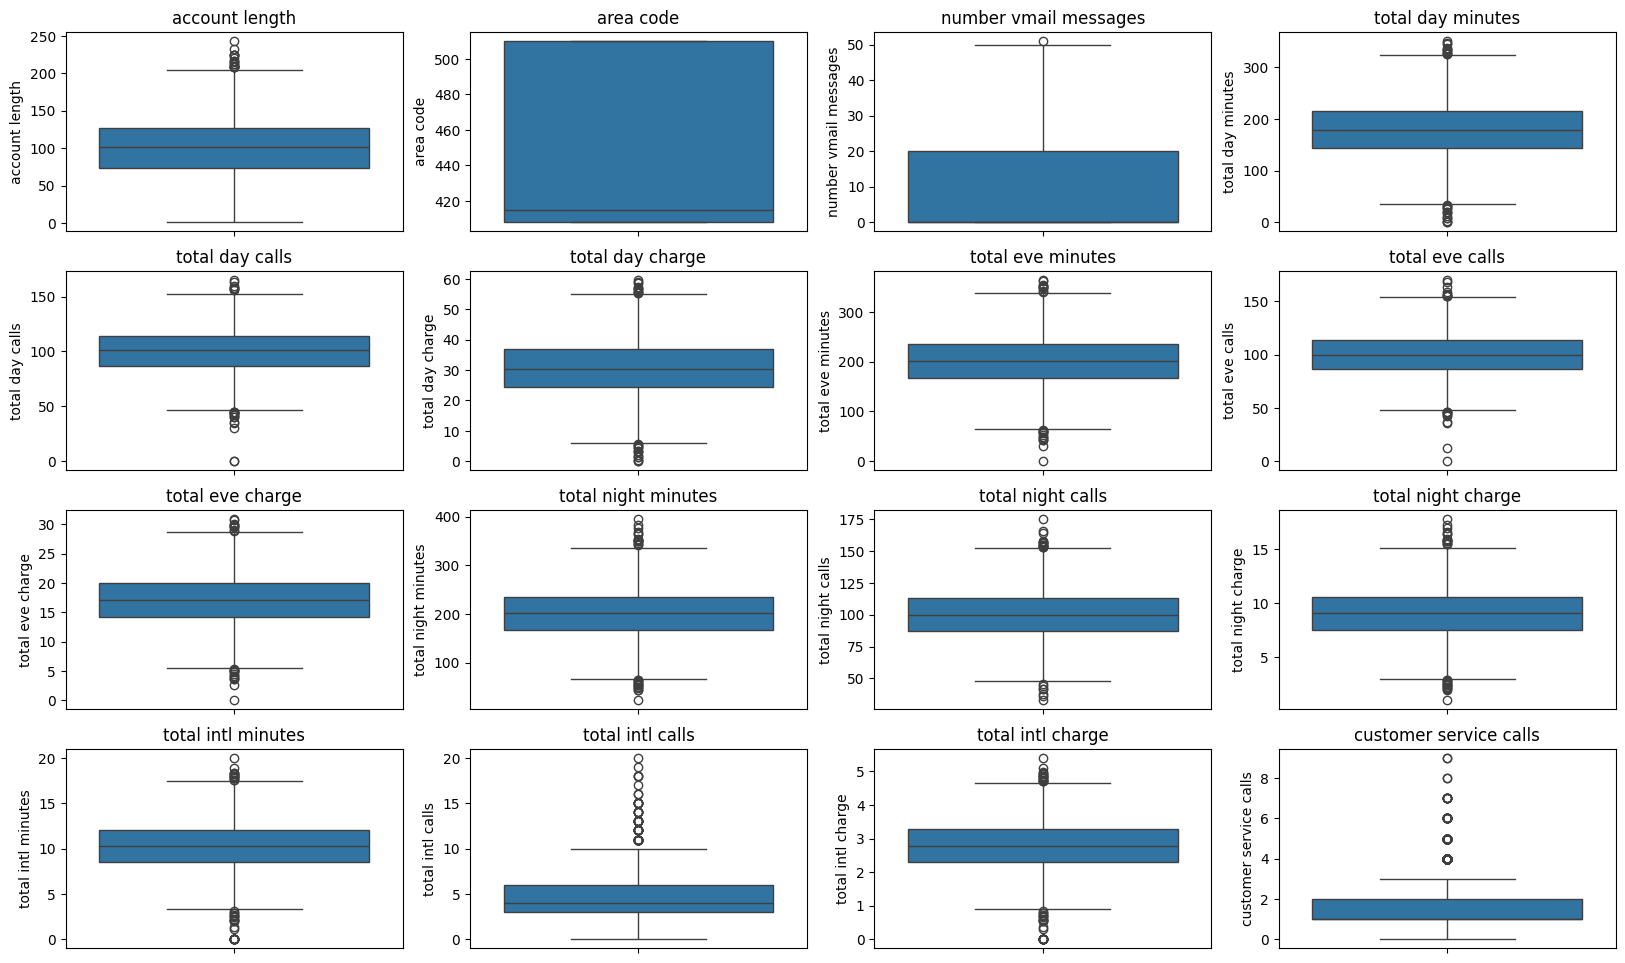

In [8]:
# boxplot for checking outliers
plt.figure(figsize=(20, 15))
for i,col in enumerate(df.select_dtypes(include=np.number).columns):
  plt.subplot(5,4,i+1)
  sns.boxplot(data=df, y=col)
  plt.title(col)
plt.show()

In [9]:
def detect_outliers_iqr(df):
  outlier_count = {}
  for column in df.select_dtypes(include='number'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]
  return outlier_count

outliers_iqr = detect_outliers_iqr(df)
outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'No of Outliers'])

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


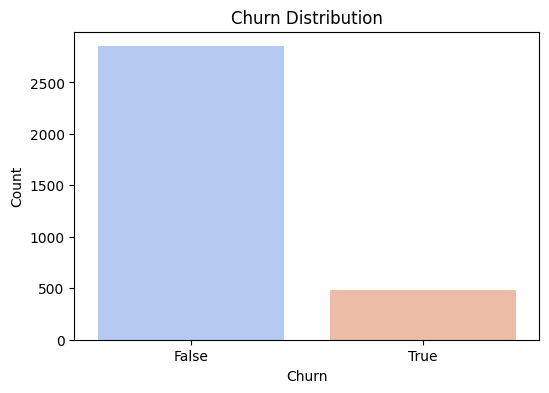

In [10]:
# check class imbalance
print(df['churn'].value_counts(normalize=True))
class_balance = df['churn'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

the data is more leaned towards False, so the model would always prefer giving False as an output over True because of the imbalance

this can be solved using SMOTE

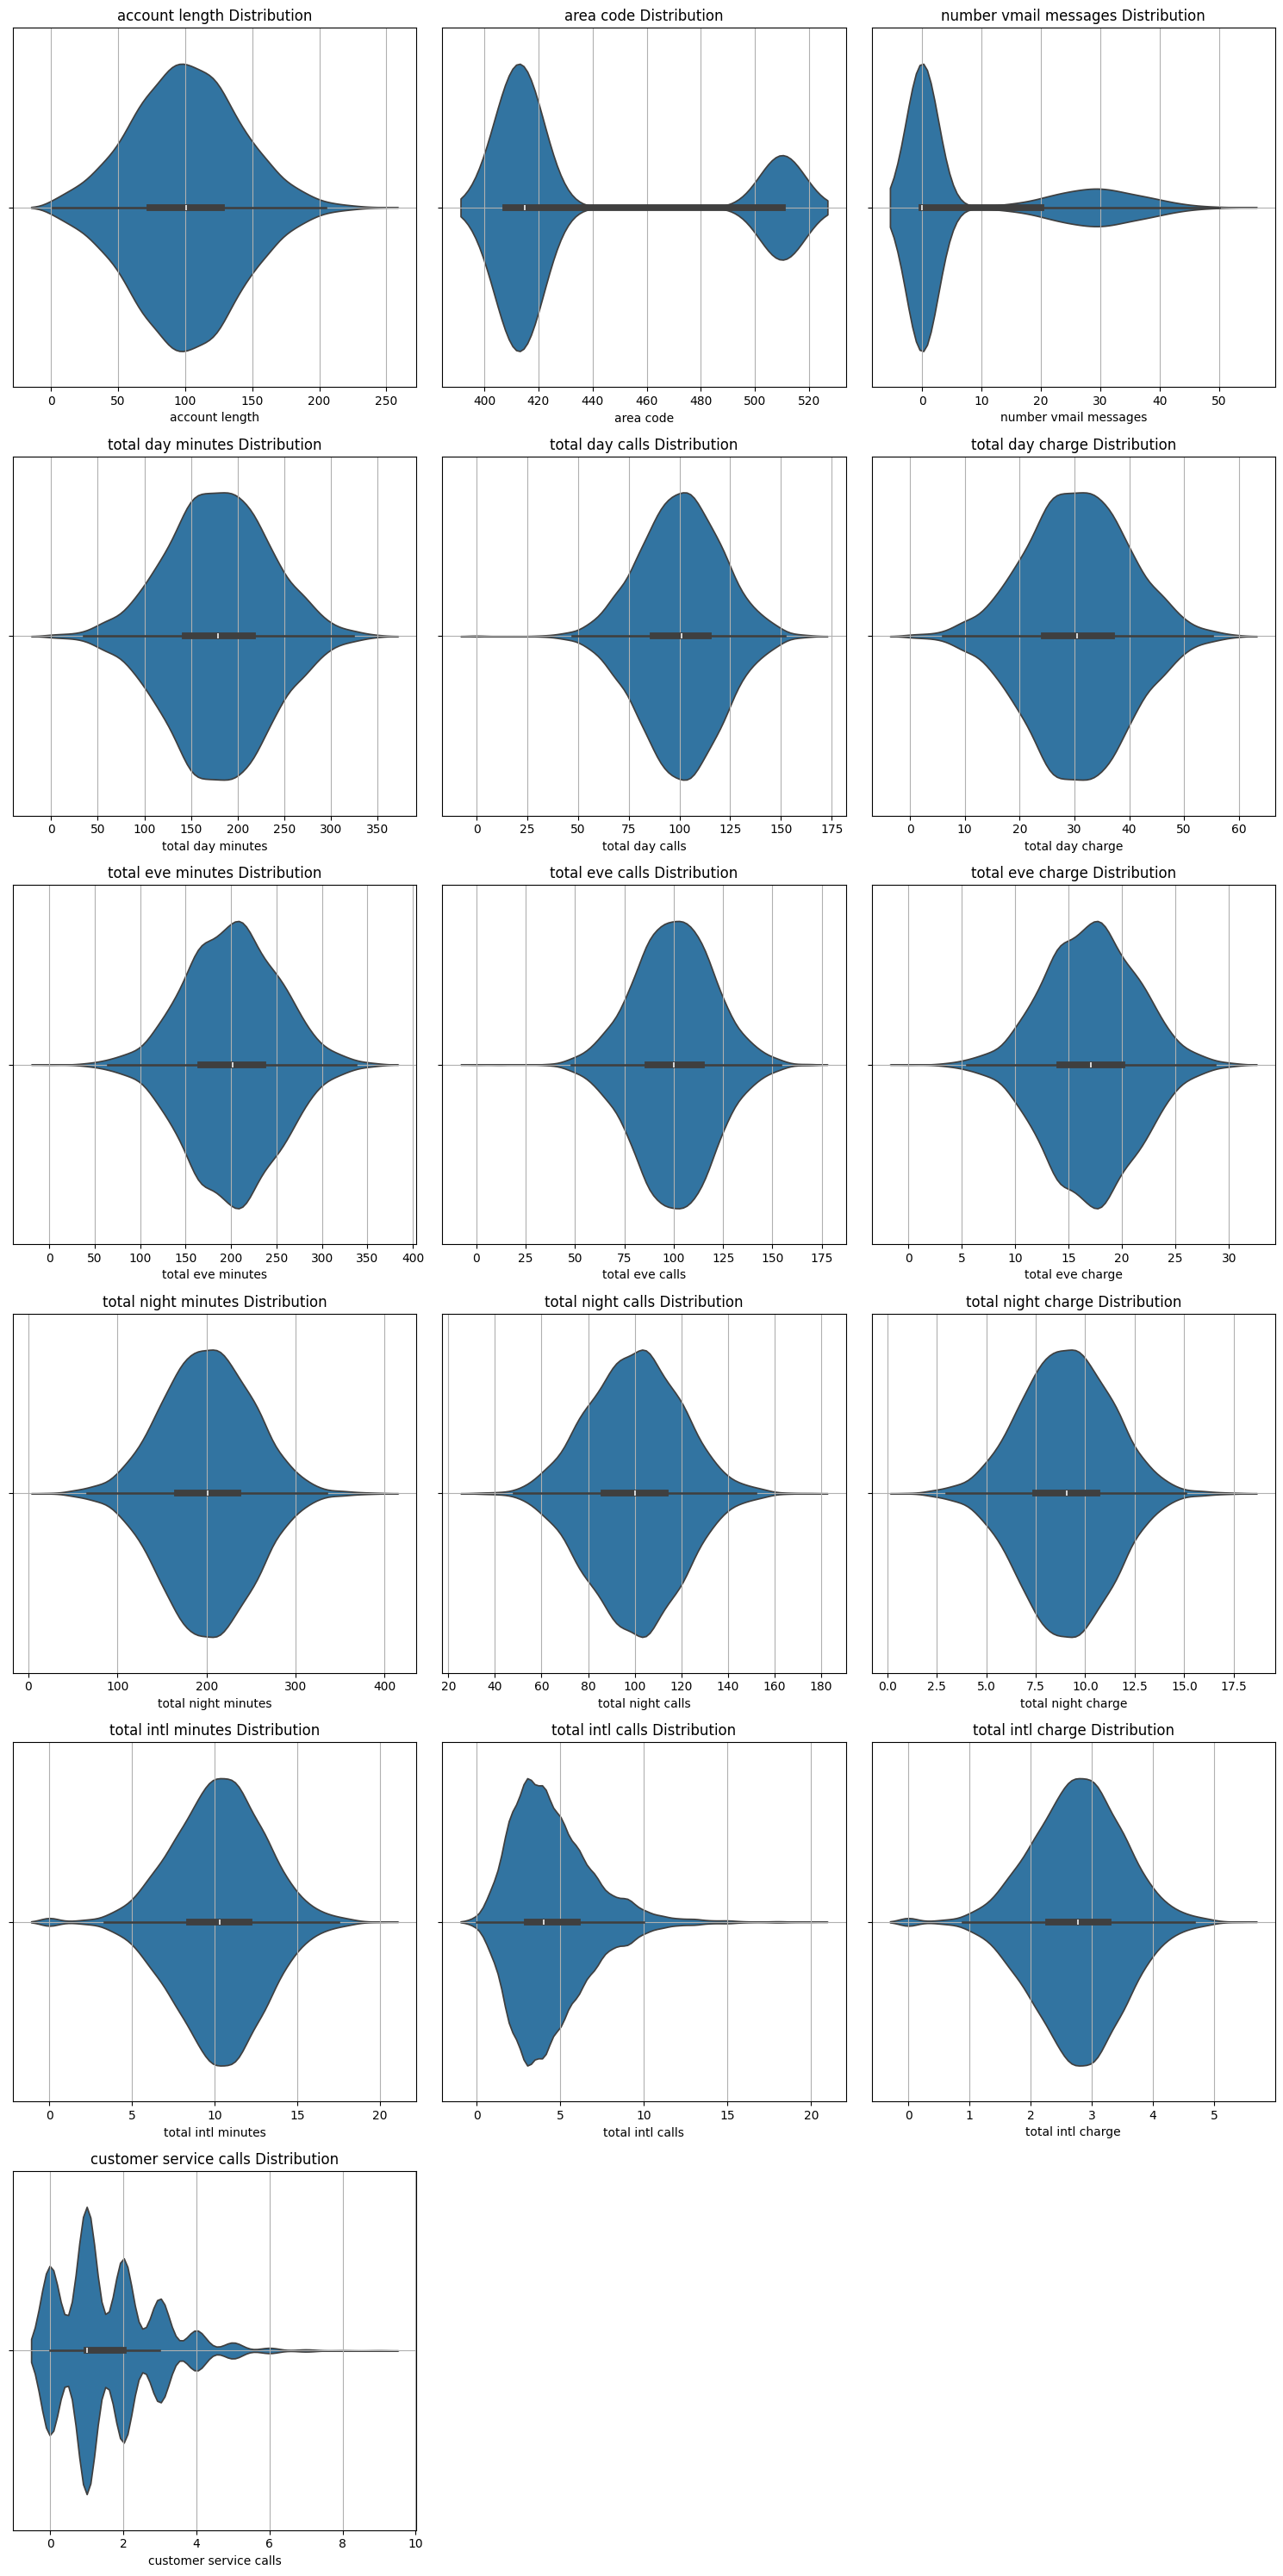

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_rows = (len(num_cols) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.violinplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].grid(True)

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

From the above graph we can see that 3 features are not normally distributed
1. number vmail messages
2. total intl calls
3. customer service calls


Number of unique states: 51


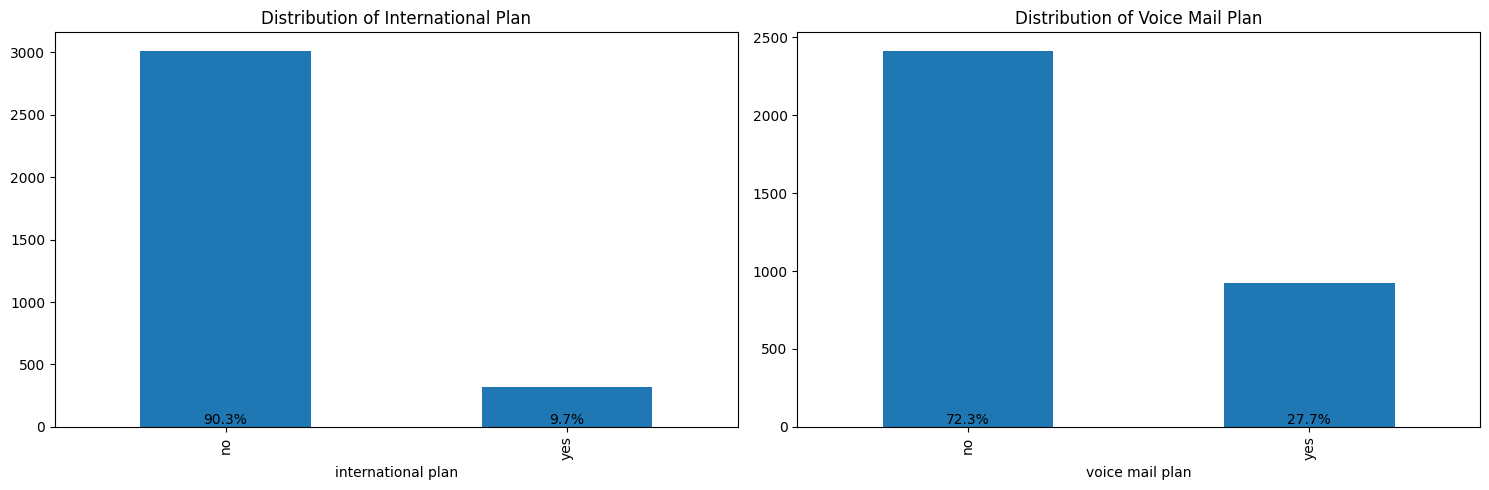

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot of International Plan
int_plan = df['international plan'].value_counts().plot(
    kind='bar',
    ax=ax1,
    title='Distribution of International Plan'
)
for i, v in enumerate(df['international plan'].value_counts(normalize=True)):
    ax1.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')

# plot of Voice Mail Plan
voice_plan = df['voice mail plan'].value_counts().plot(
    kind='bar',
    ax=ax2,
    title='Distribution of Voice Mail Plan'
)
for i, v in enumerate(df['voice mail plan'].value_counts(normalize=True)):
    ax2.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')

print(f"\nNumber of unique states: {df['state'].nunique()}")

plt.tight_layout()
plt.show()

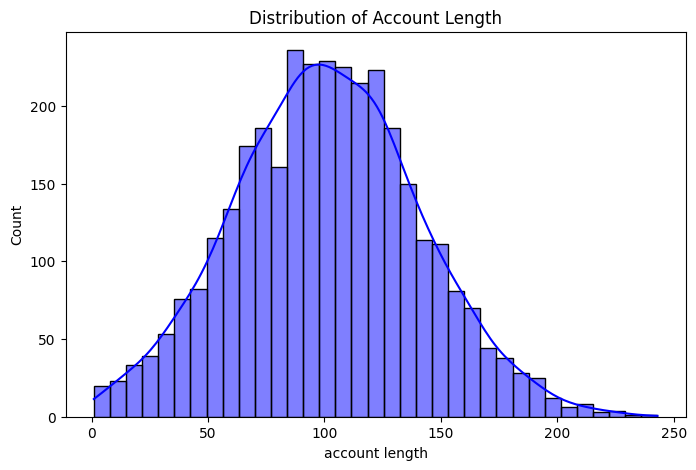

In [13]:
# distribution of account length
plt.figure(figsize=(8, 5))
sns.histplot(df['account length'], kde=True, color='blue')
plt.title("Distribution of Account Length")
plt.show()

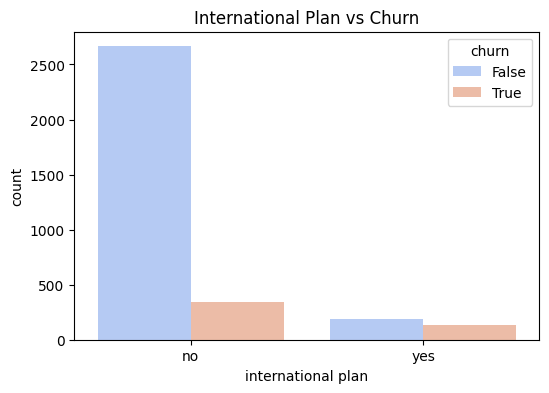

In [14]:
# intnl plan vs churn rate
plt.figure(figsize=(6,4))
sns.countplot(x='international plan', hue='churn', data=df, palette='coolwarm')
plt.title("International Plan vs Churn")
plt.show()

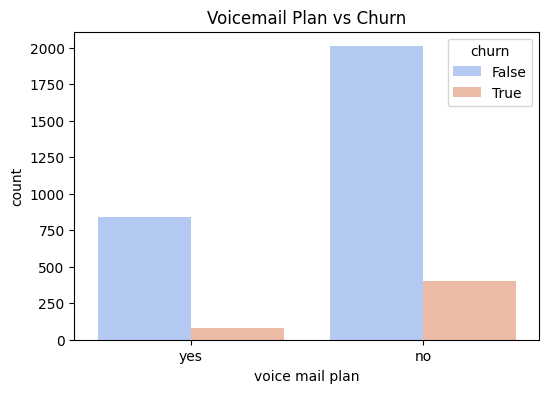

In [15]:
# voicemail plan vs churn rate
plt.figure(figsize=(6,4))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='coolwarm')
plt.title("Voicemail Plan vs Churn")
plt.show()

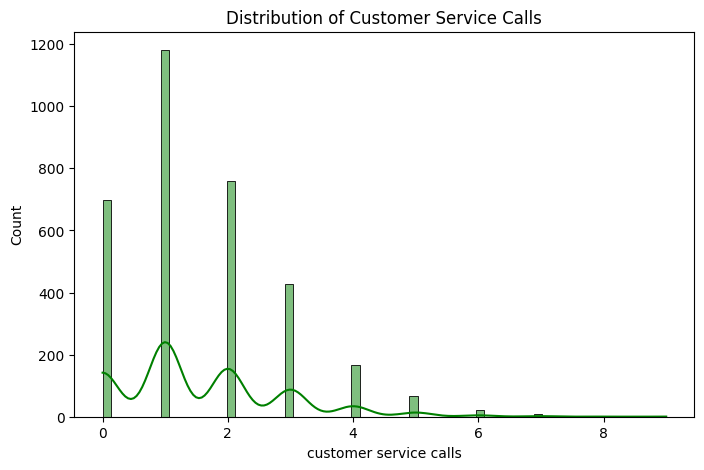

In [16]:
# customer service calls distribution
plt.figure(figsize=(8,5))
sns.histplot(df['customer service calls'], kde=True, color='green')
plt.title("Distribution of Customer Service Calls")
plt.show()

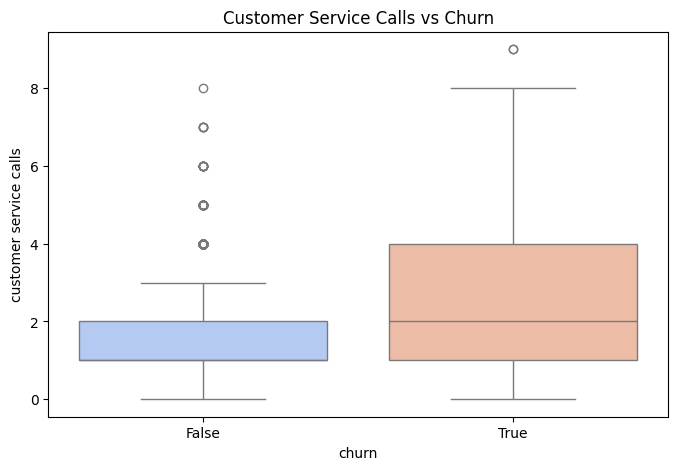

In [17]:
# customer service call vs churn rate
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='customer service calls', data=df, palette='coolwarm')
plt.title("Customer Service Calls vs Churn")
plt.show()

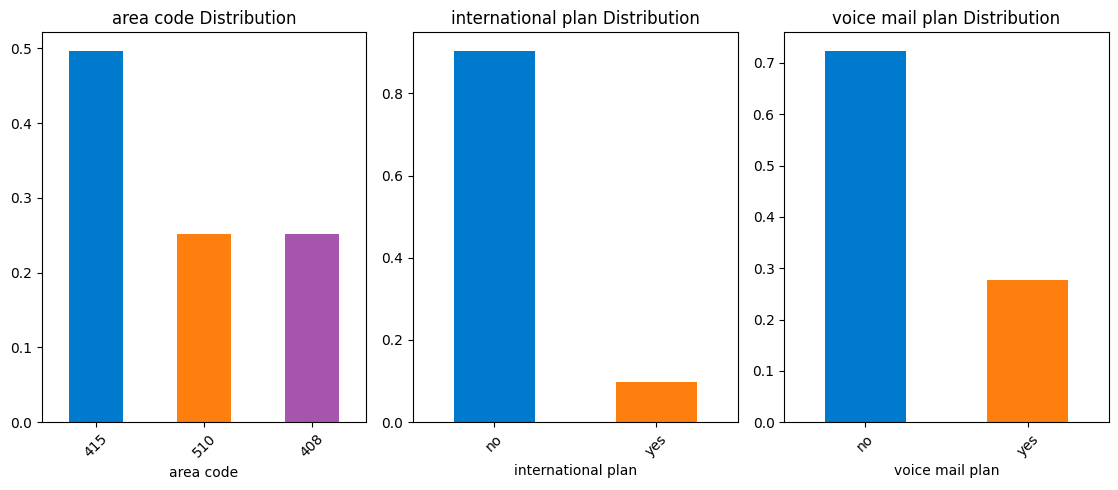

In [18]:
# distribution of categorical columns
cat_cols = ['area code', 'international plan', 'voice mail plan']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 4, i+1)
    df[col].value_counts(normalize=True).plot(kind='bar', color=['#007acc', '#ff7f0e', '#a754ae'])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### EDA Results
- Total observations = 3333
- No null and duplicate values
- All features data type are correct except for 'area code'
- 90% dont have international plan and 72% dont have voicemail plan
- Most of the columns have outliers to be handled
- Imbalanced dataset because 85.5% do not churn and 14.5% churn

Thus, this is a classification problem.

Model evaluation criteria except accuracy should be used else it will lie in the favour of 'do not churn'.

In [19]:
# changing the datatype of area code
df['area code'] = df['area code'].astype('object')
df.describe(include='object')

,state,area code,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3,2,2
top,WV,415,no,no
freq,106,1655,3010,2411


# Correlation matrix

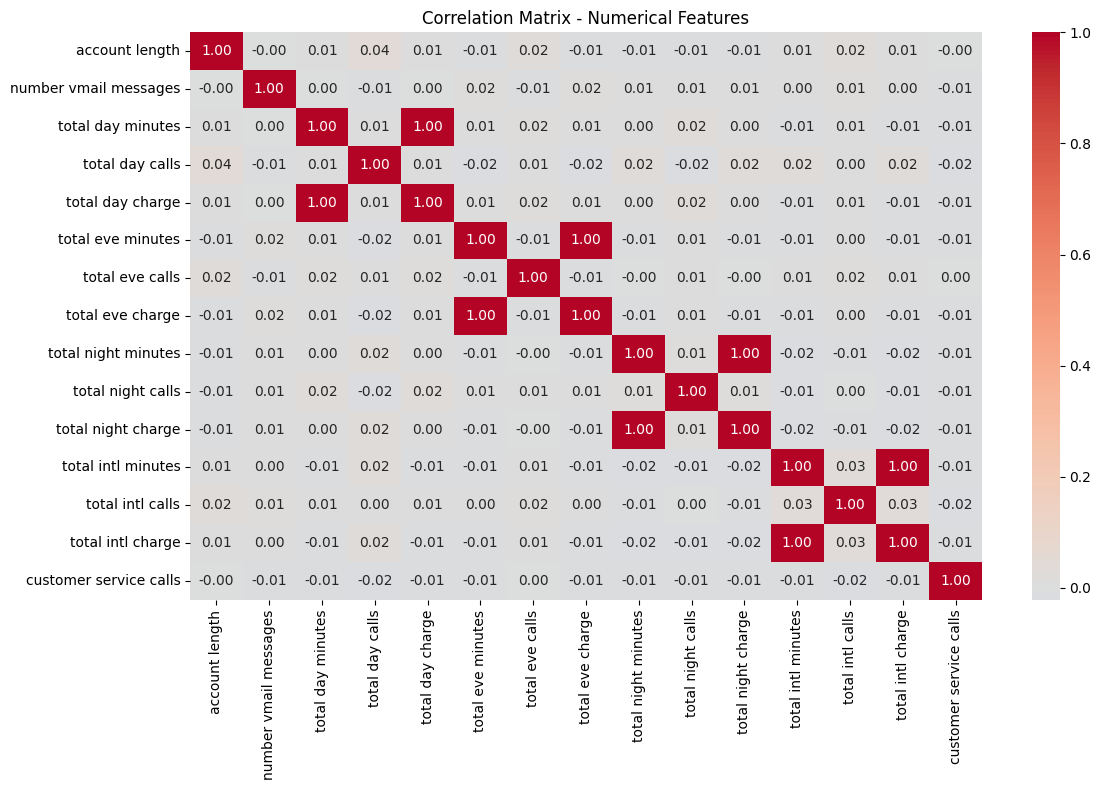

In [20]:
# for num cols
num_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
            'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
            'total intl calls', 'total intl charge', 'customer service calls']

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

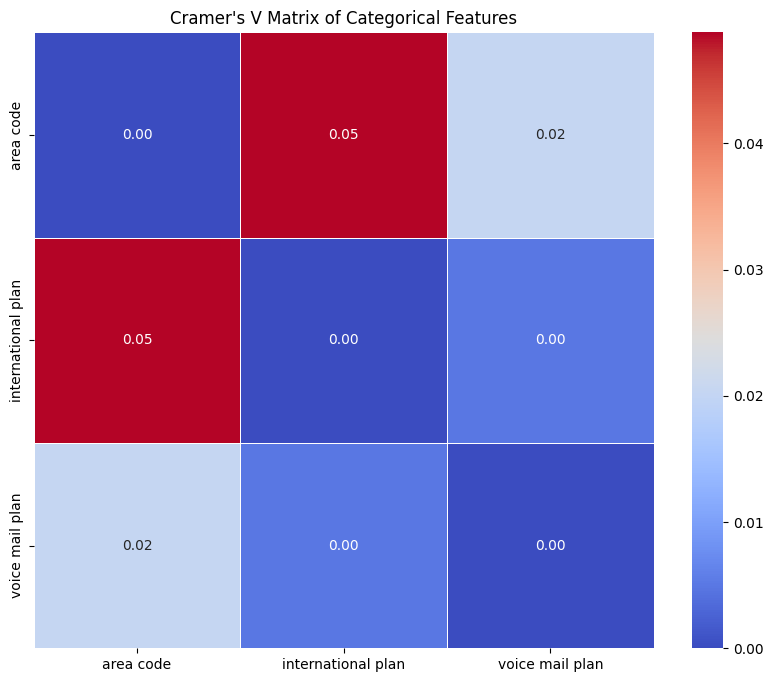

In [21]:
from scipy.stats import chi2_contingency

# for cat cols
cat_cols = ['area code', 'international plan', 'voice mail plan']

def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  return np.sqrt(chi2/(n*(min(r,k)-1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
  for col2 in cat_cols:
    if col1 != col2:
      cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Cramer\'s V Matrix of Categorical Features')
plt.show()

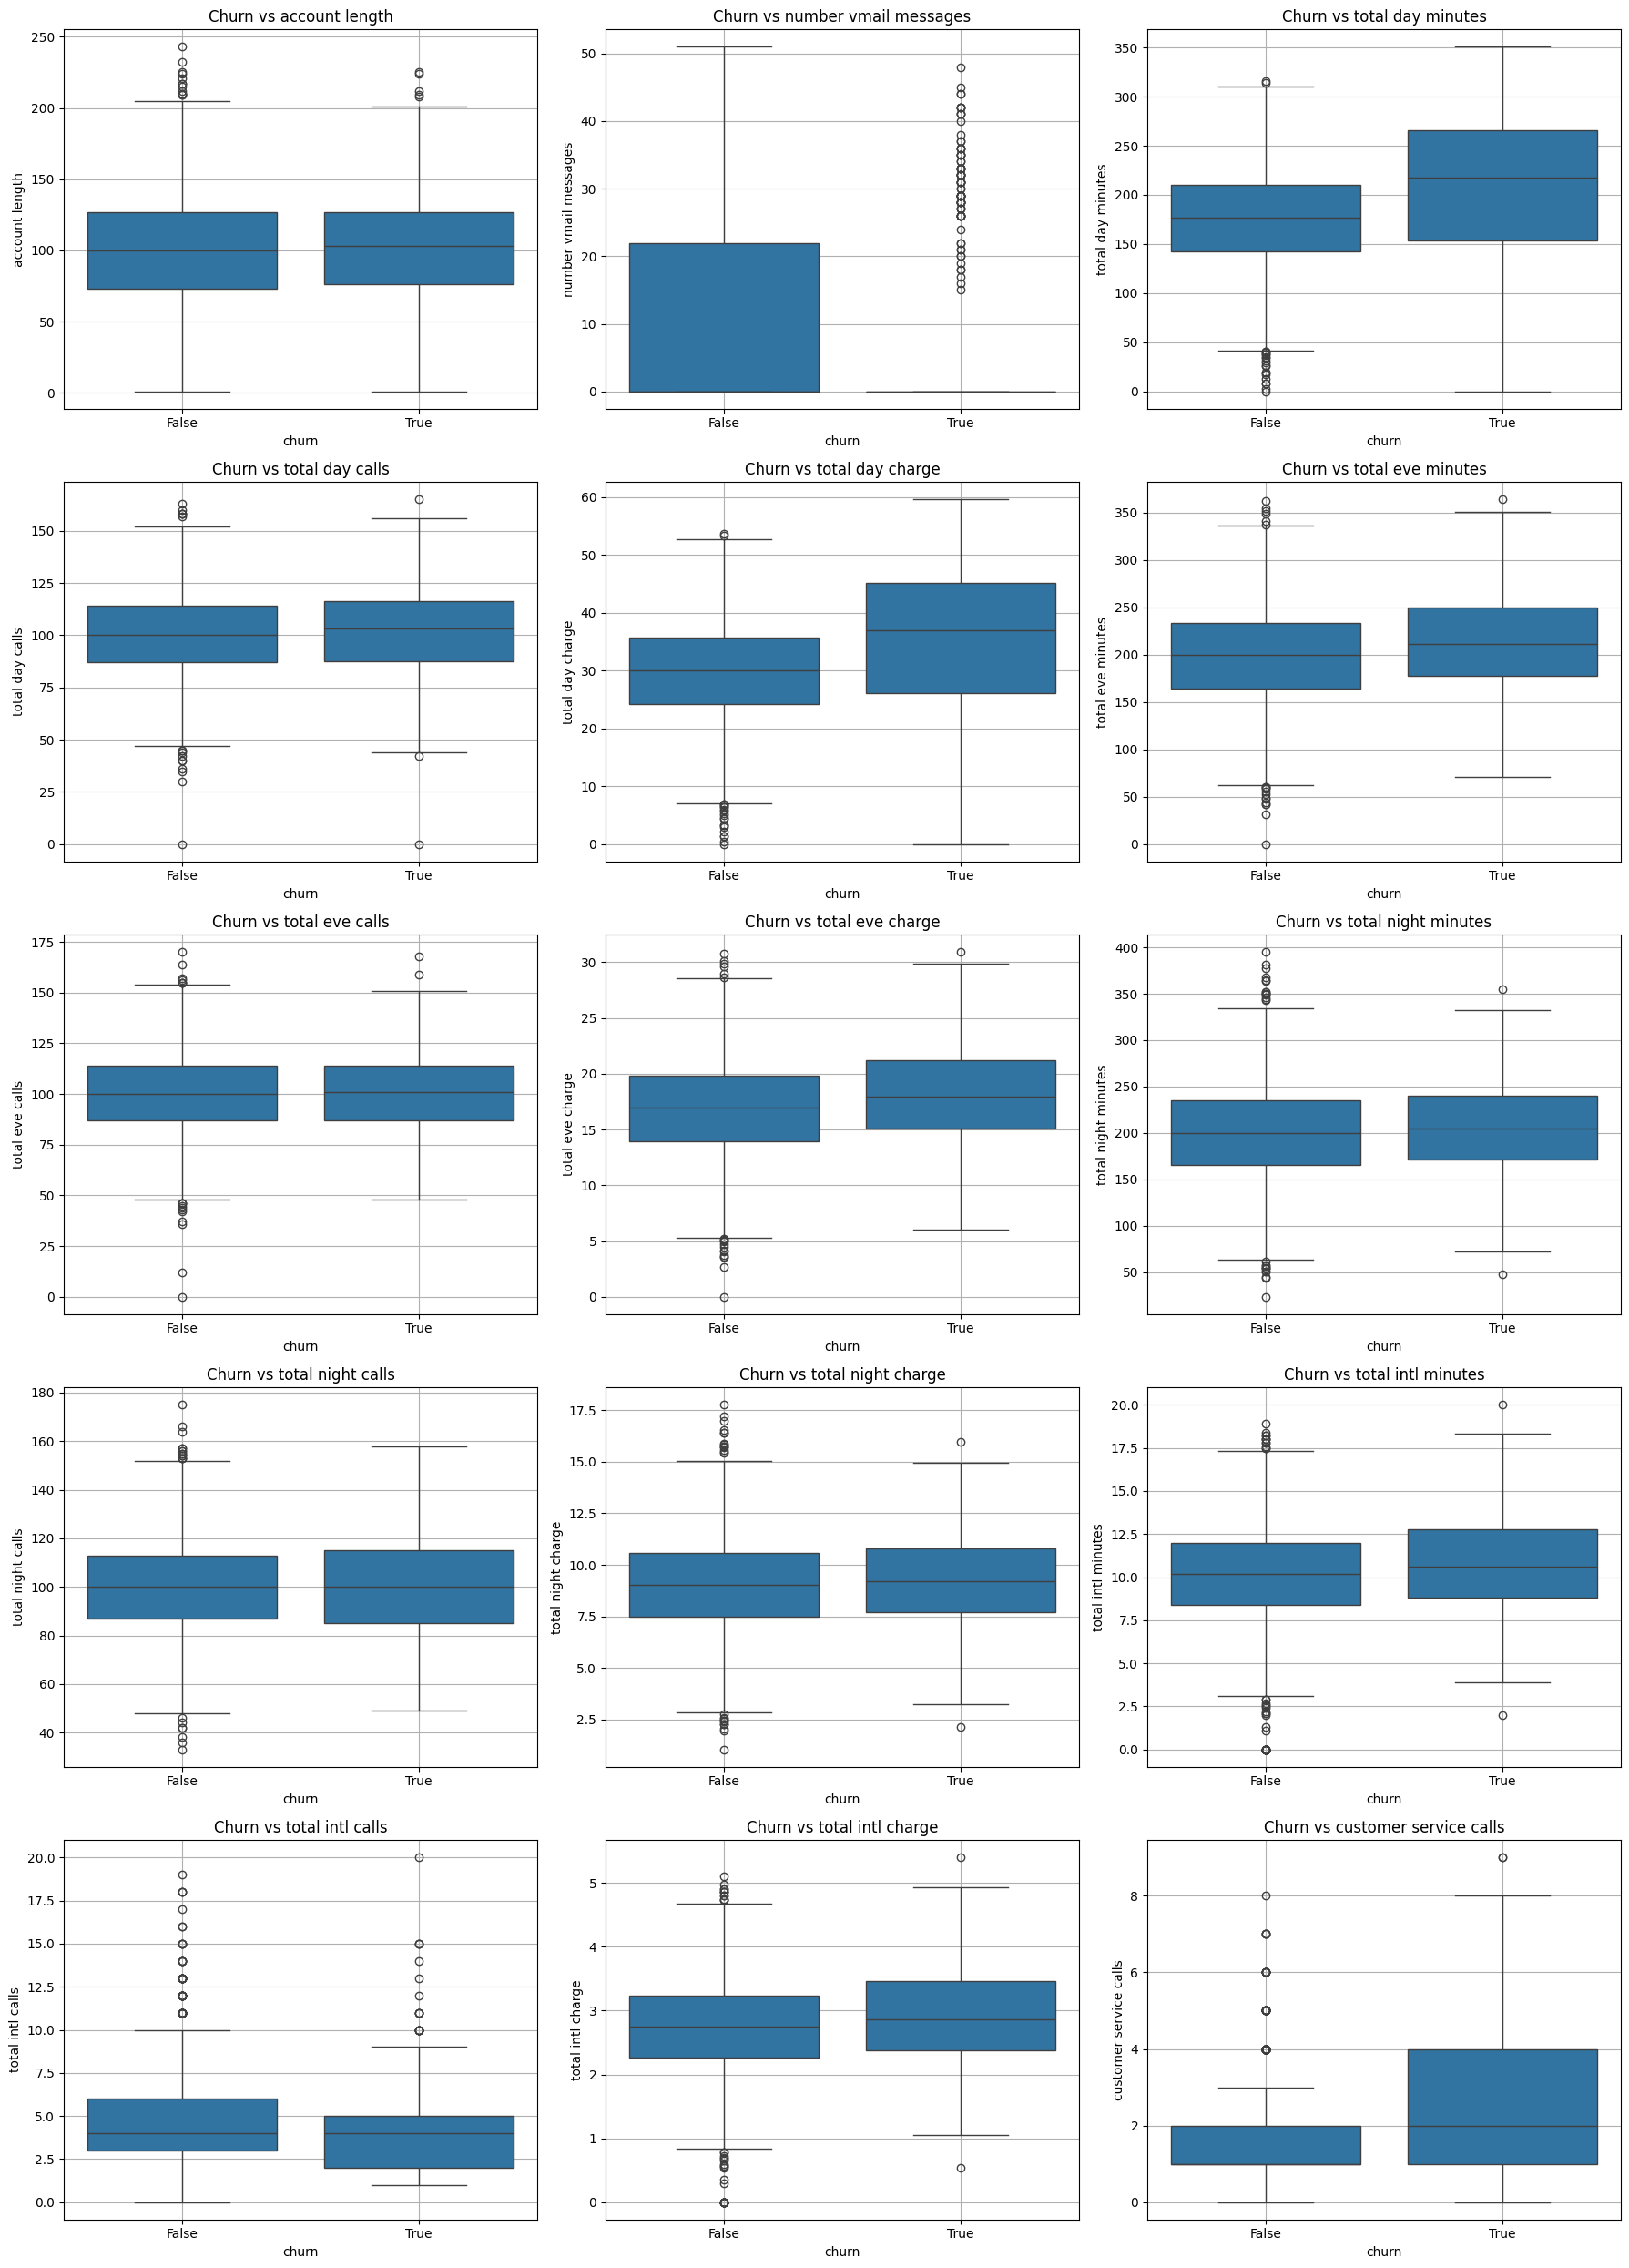

In [22]:
plt.figure(figsize=(18,25))
for i, col in enumerate(num_cols):
  plt.subplot(5,3,i+1)
  sns.boxplot(x='churn', y=col, data=df)
  plt.title(f'Churn vs {col}')
  plt.grid(True)
plt.tight_layout()

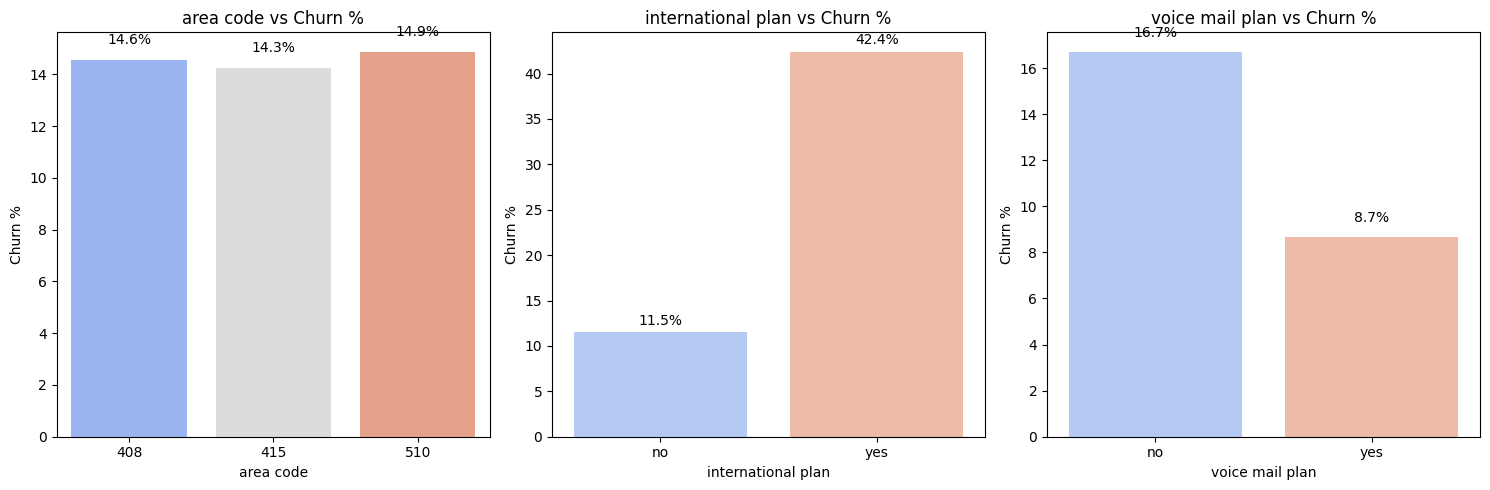

In [23]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)

    churn_pct = pd.crosstab(df[col], df['churn'], normalize='index') * 100

    ax = sns.barplot(x=churn_pct.index, y=churn_pct[True], palette='coolwarm')

    for j, v in enumerate(churn_pct[True]):
        ax.text(j, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

    plt.title(f'{col} vs Churn %')
    plt.ylabel('Churn %')
    plt.xlabel(col)
    plt.xticks(rotation=45 if col == 'state' else 0)

plt.tight_layout()
plt.show()

From the plot of numerical features, we can see that the following could be good predictors for churn;

- total day minutes and total day charges -> more minutes causes more charge which might force the customer to churn
- total eve minutes and total eve charges -> same reason as above
- customer service calls -> churned customers have high service calls

From the plot of categorical features, we can see that the following could be good predictors for churn;
- customer churn is high who have intl plan included
- not having voicemail plan is a reason to churn

# Feature Engg

In [24]:
df['day_charge_per_minute'] = df['total day charge'] / df['total day minutes']
df['eve_charge_per_minute'] = df['total eve charge'] / df['total eve minutes']

# bin total day minutes and total eve minutes
df['day_minutes_bin'] = pd.cut(df['total day minutes'], bins=[0, 100, 200, 300, 400], labels=['low', 'medium', 'high', 'very high'])
df['eve_minutes_bin'] = pd.cut(df['total eve minutes'], bins=[0, 100, 200, 300, 400], labels=['low', 'medium', 'high', 'very high'])

# combine customer service calls into bins
df['customer_service_calls_bin'] = pd.cut(df['customer service calls'], bins=[0, 2, 5, 10], labels=['low', 'medium', 'high'])

# Encoding categorical features

In [25]:
# label encoding for binary
df['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})

# one hot encoding for binned cols
df = pd.get_dummies(df, columns=['state', 'day_minutes_bin', 'eve_minutes_bin', 'customer_service_calls_bin'])

# Handling class imbalance

In [26]:
df = df.dropna()

In [28]:
churn_count = df['churn'].value_counts()
print(churn_count)

from imblearn.over_sampling import SMOTE
X = df.drop(columns='churn')
y = df['churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

print(y_res.value_counts())

churn
False    2848
True      482
Name: count, dtype: int64
churn
False    2848
True     2848
Name: count, dtype: int64


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Model Implementation

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(f'LR Accuracy: {(round(accuracy_score(y_test, y_pred_lr), 4))*100}%')
print(f'LR Classification Report: {classification_report(y_test, y_pred_lr)}')

LR Accuracy: 73.08%
LR Classification Report:               precision    recall  f1-score   support

       False       0.76      0.71      0.73       889
        True       0.70      0.76      0.73       820

    accuracy                           0.73      1709
   macro avg       0.73      0.73      0.73      1709
weighted avg       0.73      0.73      0.73      1709



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print(f'RF Accuracy: {(round(accuracy_score(y_test, y_pred_rf), 4))*100}%')
print(f'RF Classification Report: {classification_report(y_test, y_pred_rf)}')

RF Accuracy: 96.37%
RF Classification Report:               precision    recall  f1-score   support

       False       0.96      0.97      0.97       889
        True       0.97      0.95      0.96       820

    accuracy                           0.96      1709
   macro avg       0.96      0.96      0.96      1709
weighted avg       0.96      0.96      0.96      1709



### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print(f'GB Accuracy: {(round(accuracy_score(y_test, y_pred_gb), 4))*100}%')
print(f'GB Classification Report: {classification_report(y_test, y_pred_gb)}')
print(confusion_matrix(y_test, y_pred_gb))

GB Accuracy: 94.85%
GB Classification Report:               precision    recall  f1-score   support

       False       0.94      0.96      0.95       889
        True       0.95      0.94      0.95       820

    accuracy                           0.95      1709
   macro avg       0.95      0.95      0.95      1709
weighted avg       0.95      0.95      0.95      1709

[[852  37]
 [ 51 769]]


Random Forest gave better accuracy than Logistic Regresision and Gradient Boosting.

# Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [10,20,None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=para_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.5s
[CV] END .....................max_depth=10, n_estimators=200; total time=   3.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   2.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=   3.8s
[CV] END .....................max_depth=10, n_estimators=200; total time=   3.5s
[CV] END .....................max_depth=10, n_estimators=500; total time=   8.9s
[CV] END .....................max_depth=10, n_est

In [34]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [10,20,None]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=para_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV] END .....................max_depth=10, n_estimators=100; total time=  23.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  14.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=  19.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=  23.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=  20.0s
[CV] END .....................max_depth=10, n_estimators=200; total time=  39.6s
[CV] END .....................max_depth=10, n_estimators=200; total time=  47.4s
[CV] END .....................max_depth=10, n_estimators=200; total time=  46.3s
[CV] END .....................max_depth=10, n_estimators=200; total time=  42.2s
[CV] END .....................max_depth=10, n_estimators=200; total time=  41.8s
[CV] END .....................max_depth=10, n_estimators=500; total time= 1.4min
[CV] END .....................max_depth=10, n_estimators=500; total time= 1.4min
[CV] END ...................

KeyboardInterrupt: 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3330 entries, 0 to 3332
Data columns (total 83 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   account length                     3330 non-null   int64  
 1   area code                          3330 non-null   object 
 2   international plan                 3330 non-null   int64  
 3   voice mail plan                    3330 non-null   int64  
 4   number vmail messages              3330 non-null   int64  
 5   total day minutes                  3330 non-null   float64
 6   total day calls                    3330 non-null   int64  
 7   total day charge                   3330 non-null   float64
 8   total eve minutes                  3330 non-null   float64
 9   total eve calls                    3330 non-null   int64  
 10  total eve charge                   3330 non-null   float64
 11  total night minutes                3330 non-null   float64
 1

# Final Model Evaluation

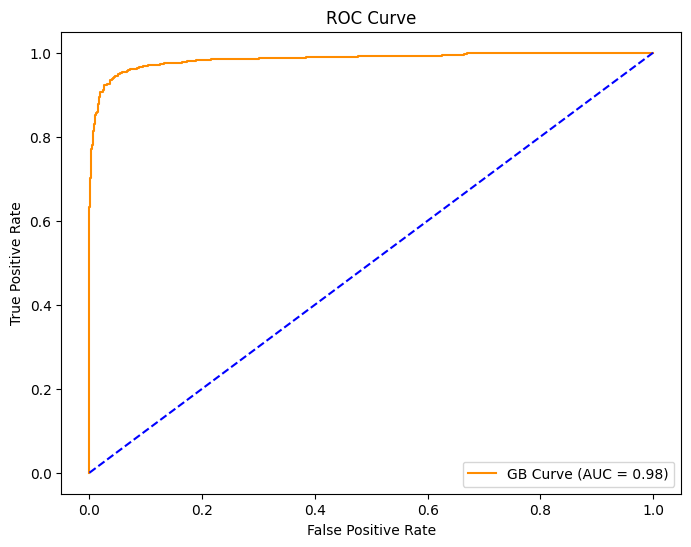

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

# model performance
accuracy = accuracy_score(y_test, y_pred_gb)
classification_report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

y_pred_proba = gb_model.predict_proba(X_test)[:,1] # for +ve class
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# plotting ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label=f'GB Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [39]:
print(f"Final Gradient Boosting Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", conf_matrix)
print(f"\nROC AUC Score: {roc_auc:.2f}")

Final Gradient Boosting Model Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       889
        True       0.95      0.94      0.95       820

    accuracy                           0.95      1709
   macro avg       0.95      0.95      0.95      1709
weighted avg       0.95      0.95      0.95      1709


Confusion Matrix:
 [[852  37]
 [ 51 769]]

ROC AUC Score: 0.98


In [40]:
import joblib
joblib.dump(gb_model, 'gb_model.pkl')

['gb_model.pkl']

# Test on user defined data

In [41]:
import pandas as pd
import joblib

# Load the saved model
def load_model(model_path='gb_model.pkl'):
    return joblib.load(model_path)

# Preprocess new user input data
def preprocess_user_input(user_data):
    # Create a DataFrame from user input
    user_df = pd.DataFrame([user_data])
    
    # Ensure all columns are present with correct types (just like the training data)
    columns = [
        'account length', 'area code', 'international plan', 'voice mail plan', 
        'number vmail messages', 'total day minutes', 'total day calls', 
        'total day charge', 'total eve minutes', 'total eve calls', 
        'total eve charge', 'total night minutes', 'total night calls', 
        'total night charge', 'total intl minutes', 'total intl calls', 
        'total intl charge', 'customer service calls', 'day_charge_per_minute', 
        'eve_charge_per_minute', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 
        'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 
        'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 
        'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 
        'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 
        'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 
        'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 
        'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 
        'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 
        'day_minutes_bin_low', 'day_minutes_bin_medium', 'day_minutes_bin_high', 
        'day_minutes_bin_very high', 'eve_minutes_bin_low', 'eve_minutes_bin_medium', 
        'eve_minutes_bin_high', 'eve_minutes_bin_very high', 
        'customer_service_calls_bin_low', 'customer_service_calls_bin_medium', 
        'customer_service_calls_bin_high'
    ]
    
    # Add missing columns with default values (for one-hot encoded columns)
    missing_cols = set(columns) - set(user_df.columns)
    for col in missing_cols:
        user_df[col] = 0
    
    # Ensure the column order is the same as the model expects
    user_df = user_df[columns]
    
    return user_df

# Function to predict churn based on user input
def predict_churn(user_data):
    # Load the model
    model = load_model()
    
    # Preprocess the input data
    preprocessed_data = preprocess_user_input(user_data)
    
    # Make prediction
    prediction = model.predict(preprocessed_data)[0]
    
    # Map prediction to readable result
    return "Churn" if prediction == 1 else "No Churn"

# Example user data input (this is what the user would input via a form or CLI)
new_user_data = {
    'account length': 128,
    'area code': '408',
    'international plan': 1,
    'voice mail plan': 0,
    'number vmail messages': 0,
    'total day minutes': 180.5,
    'total day calls': 90,
    'total day charge': 45.6,
    'total eve minutes': 150.0,
    'total eve calls': 100,
    'total eve charge': 25.0,
    'total night minutes': 200.5,
    'total night calls': 90,
    'total night charge': 40.0,
    'total intl minutes': 10.0,
    'total intl calls': 3,
    'total intl charge': 2.7,
    'customer service calls': 2,
    'day_charge_per_minute': 0.253,
    'eve_charge_per_minute': 0.167,
    'state_AK': 0, 'state_AL': 0, 'state_AR': 0, 'state_AZ': 0, 
    'state_CA': 1, 'state_CO': 0, 'state_CT': 0, 'state_DC': 0, 
    'state_DE': 0, 'state_FL': 0, 'state_GA': 0, 'state_HI': 0, 
    'state_IA': 0, 'state_ID': 0, 'state_IL': 0, 'state_IN': 0, 
    'state_KS': 0, 'state_KY': 0, 'state_LA': 0, 'state_MA': 0, 
    'state_MD': 0, 'state_ME': 0, 'state_MI': 0, 'state_MN': 0, 
    'state_MO': 0, 'state_MS': 0, 'state_MT': 0, 'state_NC': 0, 
    'state_ND': 0, 'state_NE': 0, 'state_NH': 0, 'state_NJ': 0, 
    'state_NM': 0, 'state_NV': 0, 'state_NY': 0, 'state_OH': 0, 
    'state_OK': 0, 'state_OR': 0, 'state_PA': 0, 'state_RI': 0, 
    'state_SC': 0, 'state_SD': 0, 'state_TN': 0, 'state_TX': 0, 
    'state_UT': 0, 'state_VA': 0, 'state_VT': 0, 'state_WA': 0, 
    'state_WI': 0, 'state_WV': 0, 'state_WY': 0, 
    'day_minutes_bin_low': 0, 'day_minutes_bin_medium': 1, 'day_minutes_bin_high': 0, 
    'day_minutes_bin_very high': 0, 'eve_minutes_bin_low': 1, 'eve_minutes_bin_medium': 0, 
    'eve_minutes_bin_high': 0, 'eve_minutes_bin_very high': 0, 
    'customer_service_calls_bin_low': 1, 'customer_service_calls_bin_medium': 0, 
    'customer_service_calls_bin_high': 0
}

# Predict whether the new user will churn
churn_prediction = predict_churn(new_user_data)
print(f"Churn Prediction for the new user: {churn_prediction}")

Churn Prediction for the new user: No Churn
